In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
from tensorflow.examples.tutorials.mnist import input_data

In [3]:
mnist=input_data.read_data_sets('MNIST_DATA/', one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_DATA/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_DATA/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_DATA/t10k-images-idx3-ubyte.gz
Extracting MNIST_DATA/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [4]:
type(mnist)

tensorflow.contrib.learn.python.learn.datasets.base.Datasets

In [5]:
mnist.train.images[0].shape

(784,)

In [6]:
def plot_image(num):
    plt.imshow(mnist.train.images[num].reshape((28,28)),cmap='gray')
    print(mnist.train.labels[num])

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


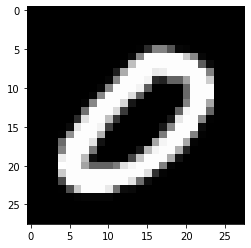

In [7]:
plot_image(5469)

In [8]:
x=tf.placeholder(tf.float32, shape=([None,784]))
W=tf.Variable(tf.zeros([784,10]))
b=tf.Variable(tf.zeros([10]))
x.shape
W.shape

TensorShape([Dimension(784), Dimension(10)])

In [9]:
y=tf.nn.softmax(tf.matmul(x , W) + b)

In [10]:
y_a=tf.placeholder(tf.float32, shape=([None, 10]))

In [11]:
cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_a - tf.log(y), reduction_indices=[1]))


In [12]:
train_step=tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cross_entropy)

In [13]:
sess=tf.InteractiveSession()

In [14]:
tf.global_variables_initializer().run()

In [15]:
for i in range(550):
    batch_x,batch_y=mnist.train.next_batch(100)
    sess.run(train_step, feed_dict={x:batch_x, y_a:batch_y})